In [1]:
import sklearn as sk
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from collections import Counter

from IPython.display import display

In [2]:
#genrate pandas dataframe 
df = pd.read_csv("application_data.csv")
rawdf = pd.read_csv("application_data.csv")
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


<Axes: xlabel='TARGET'>

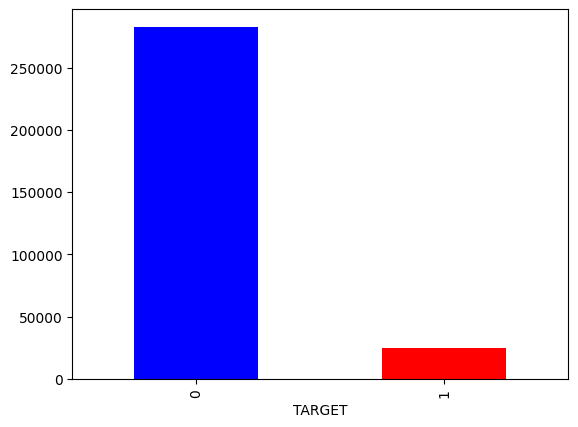

In [5]:
#visualize loan default rates
df['TARGET'].value_counts().plot(kind='bar', color=['blue', 'red'])

In [6]:
#find correlation of raw numeric data with target variable
#null values etc. have not been dealt with yet, this is just inital exploration
numeric_cols = rawdf.select_dtypes(include='number').columns.tolist()

correlations = rawdf[numeric_cols].corrwith(rawdf['TARGET']).sort_values(key=abs, ascending=False)

print(correlations.head(20))

TARGET                         1.000000
EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                 -0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                 -0.044003
FLOORSMAX_MEDI                -0.043768
FLOORSMAX_MODE                -0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE               -0.039645
OWN_CAR_AGE                    0.037612
dtype: float64


In [7]:
#find correlation of raw categorical data using target mean encoding
#Again, this is for an initial idea of what features will be significant before data pre-preprocessing and feature engineering

#get categorical columns & fill missing values
categorical_cols = rawdf.select_dtypes(include = 'object').columns.tolist()
rawdf[categorical_cols] = rawdf[categorical_cols].fillna("Missing")
#target mean encode categorical columns, store in new df
t_encoder = TargetEncoder(cols=categorical_cols)
encoded_cats = t_encoder.fit_transform(rawdf[categorical_cols], rawdf['TARGET'])

#add target to encoded_df
encoded_df = pd.concat([encoded_cats, rawdf['TARGET']], axis=1)

#calculate correlations with target and sort
corr = encoded_df[encoded_cats.columns].corrwith(encoded_df['TARGET'])
corr = corr.sort_values(key=abs, ascending=False)
print(corr.head(20))


#display(encoded_df)

OCCUPATION_TYPE               0.080142
ORGANIZATION_TYPE             0.072338
NAME_INCOME_TYPE              0.063582
NAME_EDUCATION_TYPE           0.057571
CODE_GENDER                   0.054713
WALLSMATERIAL_MODE            0.044137
EMERGENCYSTATE_MODE           0.042213
HOUSETYPE_MODE                0.040701
NAME_FAMILY_STATUS            0.040507
NAME_HOUSING_TYPE             0.036981
NAME_CONTRACT_TYPE            0.030896
FONDKAPREMONT_MODE            0.030267
FLAG_OWN_CAR                  0.021851
NAME_TYPE_SUITE               0.012122
WEEKDAY_APPR_PROCESS_START    0.007074
FLAG_OWN_REALTY               0.006148
dtype: float64


Find features with >40% missing values, drop unless very significant

In [8]:
#all columns with more than 40% missing values
missing = df.isnull().sum()/len(df)*100
missing = missing[(missing > 40)]
print(missing)

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [9]:
#EXT_SOURCE_1 was the only feature with many null entries which should be kept anyways
missing = missing[(missing > 40) & (missing.index != 'EXT_SOURCE_1')]
print(missing)



OWN_CAR_AGE                     65.990810
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49.760822
FLOORSMIN_MODE                  67

Quick and dirty imputing of missing values, median for numerical and mode for categorical

In [10]:
#drop colums with >=40% null 
df = df.drop(columns=[col for col in missing.index if col in df.columns])

#impute numeric columns with median
num_cols = df.select_dtypes(include = 'number').columns
num_imputer = SimpleImputer(strategy = 'median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

#impute categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])




In [11]:
display(df)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,Cash loans,M,N,N,0.0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252.0,0.0,Cash loans,F,N,Y,0.0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253.0,0.0,Cash loans,F,N,Y,0.0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254.0,1.0,Cash loans,F,N,Y,0.0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


display(df)

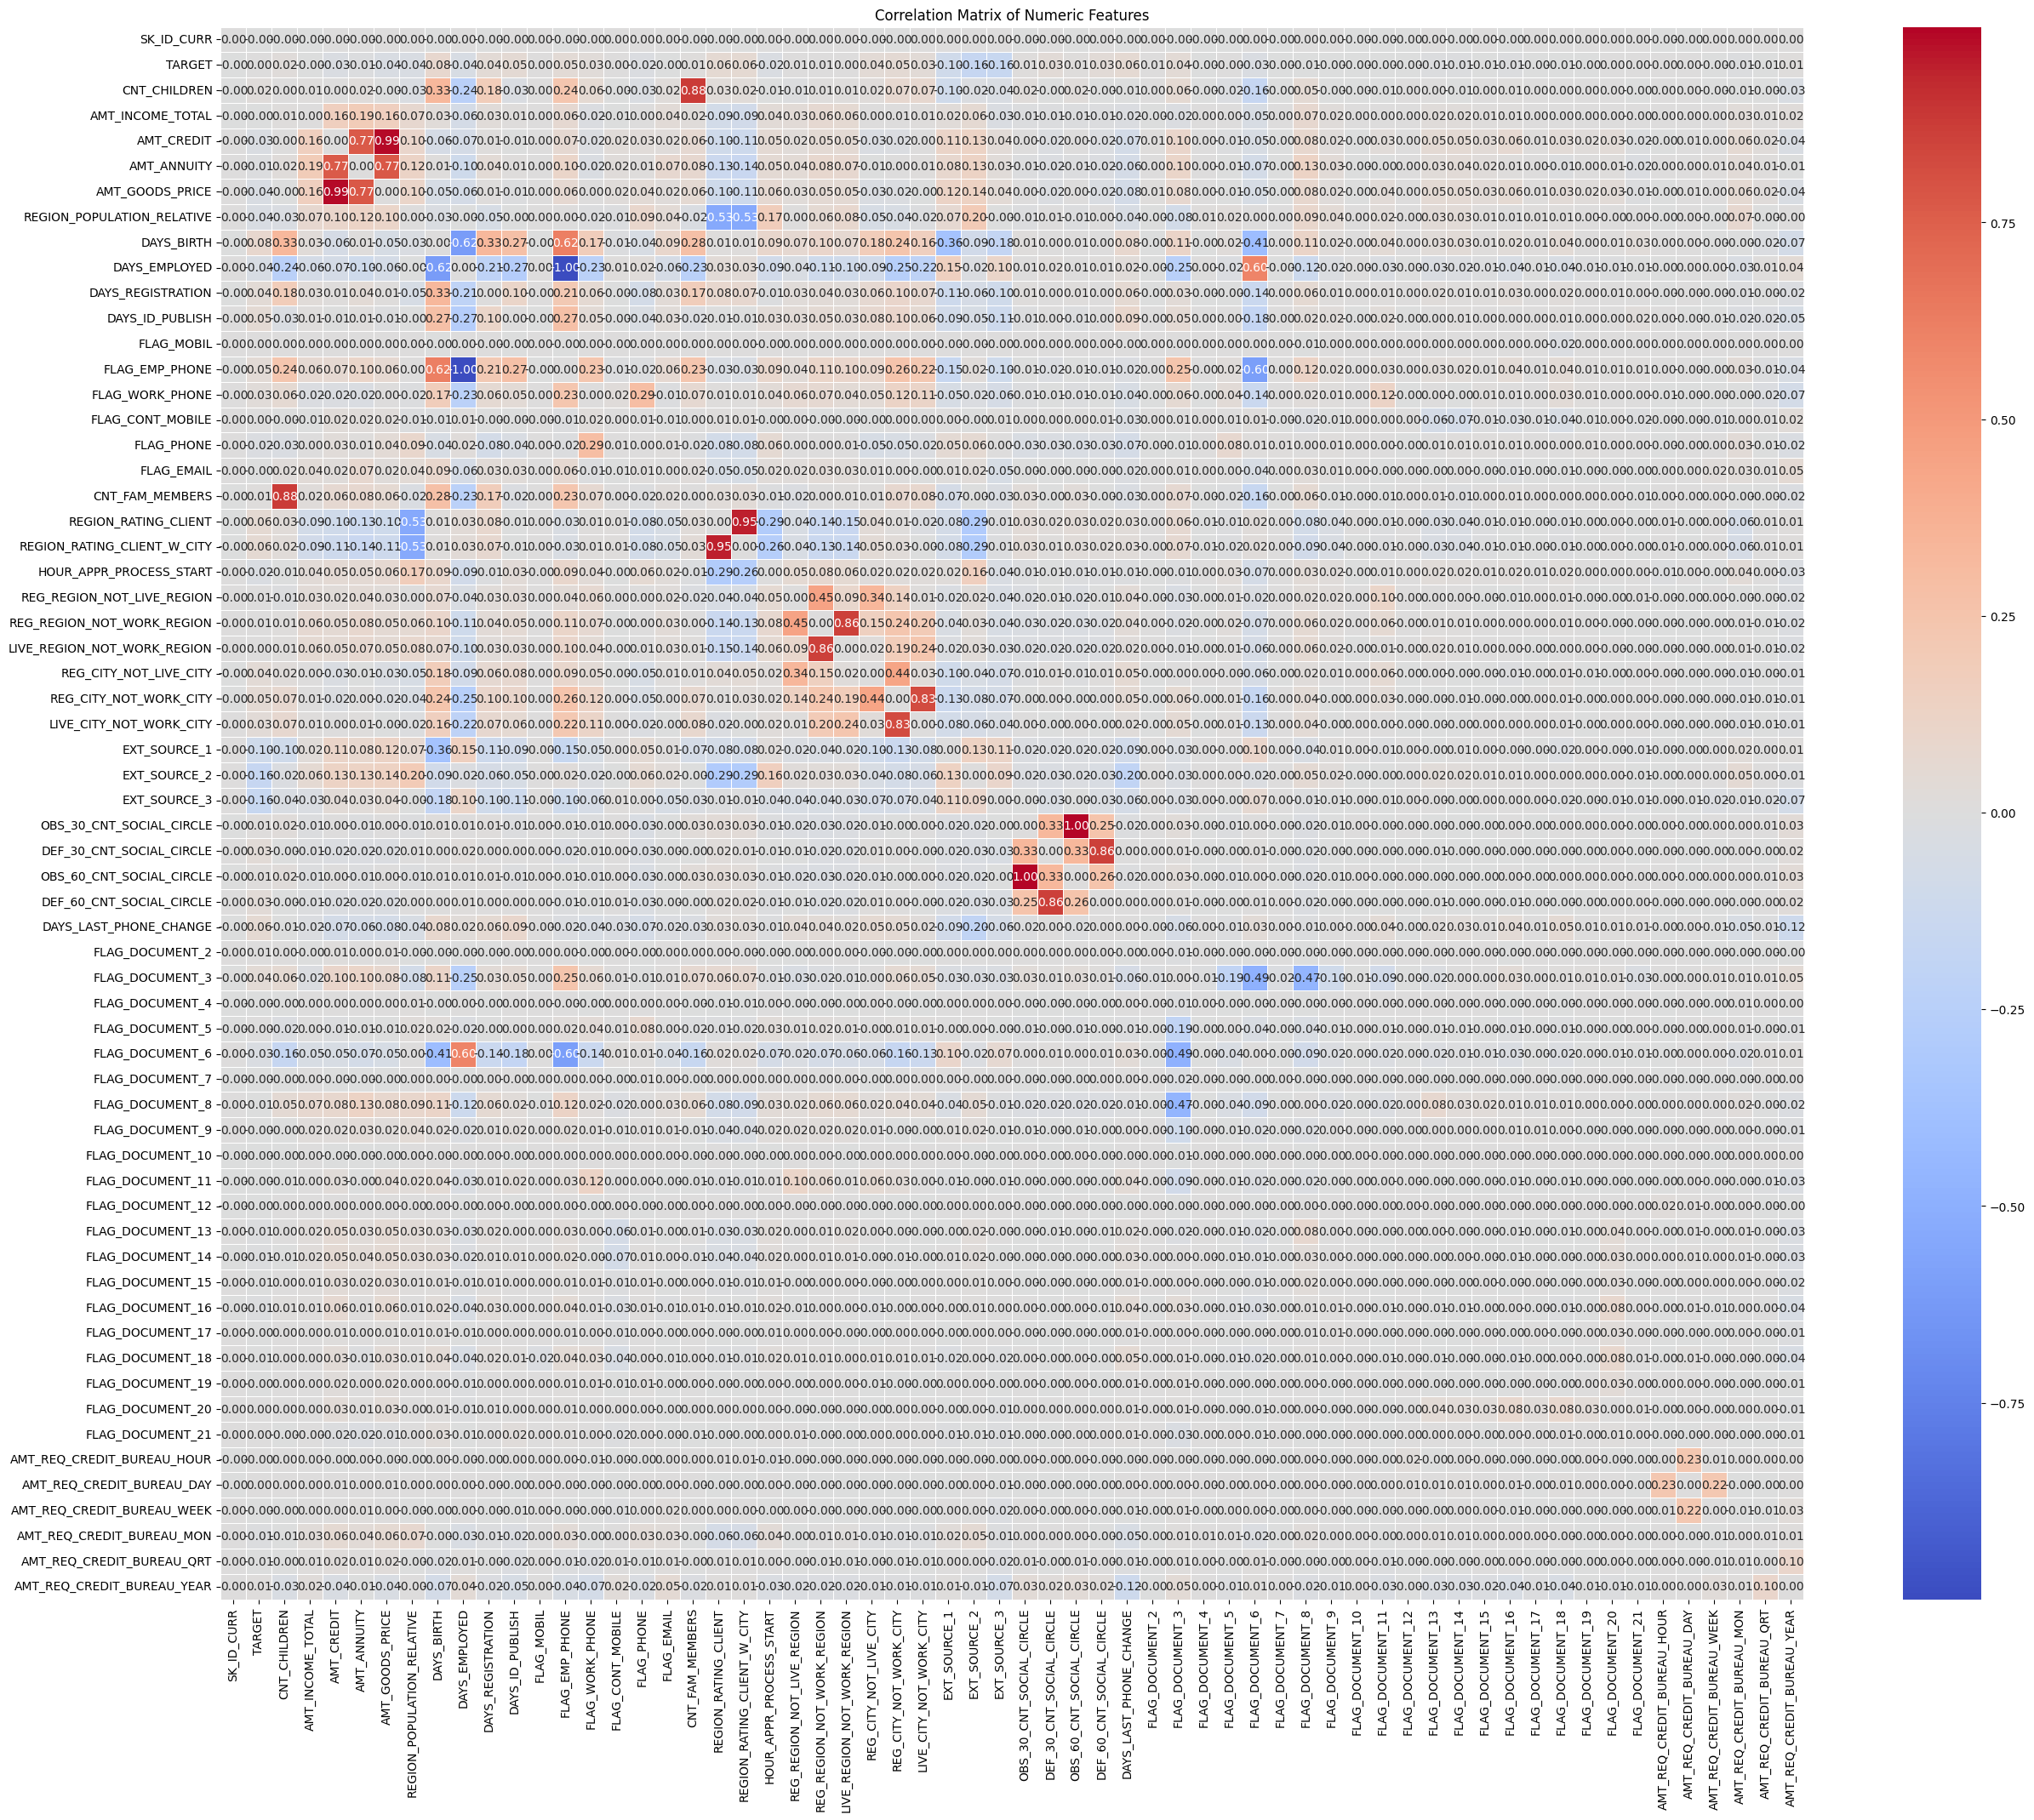

In [ ]:
#test the correlations to find redundant data

numericDF = df.select_dtypes(include='number')
corr_matrix = numericDF.corr()
#get rid of diagonal
np.fill_diagonal(corr_matrix.values, 0)

#heatmap
plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features', fontsize=12)
plt.show()


In [ ]:
#upper triangle of corr_matrix so only one of correlated pair is removed
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
print(to_drop)
df = df.drop(to_drop, axis = 1)


['AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']


In [15]:
#categorical data is all one-hot encoded and first column is dropped to avoid multicollinearity
one_hot_df = pd.get_dummies(df, dtype = int, drop_first=True)

display(one_hot_df)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,0.018801,-9461.0,-637.0,-3648.0,...,0,0,0,0,0,0,0,0,0,0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,0.003541,-16765.0,-1188.0,-1186.0,...,0,0,0,0,0,0,0,0,0,0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,0.010032,-19046.0,-225.0,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,0.008019,-19005.0,-3039.0,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,0.028663,-19932.0,-3038.0,-4311.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,0.0,157500.0,254700.0,27558.0,0.032561,-9327.0,-236.0,-8456.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252.0,0.0,0.0,72000.0,269550.0,12001.5,0.025164,-20775.0,365243.0,-4388.0,...,0,0,0,0,0,0,0,0,0,1
307508,456253.0,0.0,0.0,153000.0,677664.0,29979.0,0.005002,-14966.0,-7921.0,-6737.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254.0,1.0,0.0,171000.0,370107.0,20205.0,0.005313,-11961.0,-4786.0,-2562.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Baseline modeling, testing initial performance of various models
split_test_size = 0.3

X = one_hot_df.drop(columns=['TARGET'])
y = one_hot_df["TARGET"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, stratify=y, random_state=42)


In [17]:
#logistic regression, need to scale data first(not needed for tree models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=10000, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)



Accuracy: 0.6868753658377956

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     84806
         1.0       0.16      0.67      0.26      7448

    accuracy                           0.69     92254
   macro avg       0.56      0.68      0.53     92254
weighted avg       0.90      0.69      0.76     92254

Confusion Matrix:
 [[58354 26452]
 [ 2435  5013]]
ROC AUC Score: 0.7449197834937251


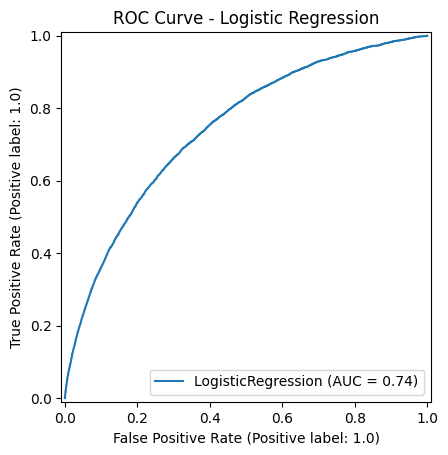

In [18]:
#baseline logistic regression performance metrics

#accuracy(data is imbalanced so not too important, more concerned with recall)
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("\nClassification Report:\n", classification_report(y_test, lr_preds))

#confusion matrix
cm = confusion_matrix(y_test, lr_preds)
print("Confusion Matrix:\n", cm)

#ROC AUC score
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]  
print("ROC AUC Score:", roc_auc_score(y_test, lr_probs))

# Plot ROC Curve
RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show() 

#Recall is terrible at 0.12, not detecting defaults. 

In [19]:
#adjust decision threshhold to detect more defaults(low recall rate)

# Get prediction probabilities
y_scores = lr.predict_proba(X_test_scaled)[:, 1]

# Adjust threshold
threshold = 0.4  # try different values like 0.3, 0.2, 0.15
adjusted_lr_preds = (y_scores >= threshold).astype(int)

# Re-evaluate
print("Adjusted Classification Report:\n", classification_report(y_test, adjusted_lr_preds))
print("Adjusted Confusion Matrix:\n", confusion_matrix(y_test, adjusted_lr_preds))



Adjusted Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.52      0.68     84806
         1.0       0.13      0.81      0.22      7448

    accuracy                           0.55     92254
   macro avg       0.55      0.67      0.45     92254
weighted avg       0.90      0.55      0.64     92254

Adjusted Confusion Matrix:
 [[44428 40378]
 [ 1393  6055]]


recall greatly improved adjusting the decision threshold, but precision dropped way too much

In [55]:
#Random Forest 

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


Accuracy: 0.9192772129121772

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84806
         1.0       0.57      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.75      0.50      0.48     92254
weighted avg       0.89      0.92      0.88     92254

Confusion Matrix:
 [[84803     3]
 [ 7444     4]]
ROC AUC Score: 0.7252047569909543


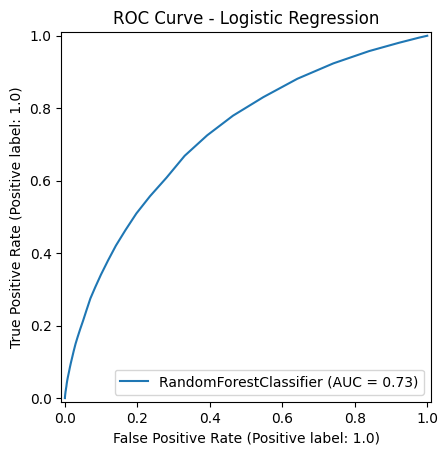

In [58]:
#accuracy(data is imbalanced so not too important, more concerned with recall)
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

#confusion matrix
cm = confusion_matrix(y_test, rf_preds)
print("Confusion Matrix:\n", cm)

#ROC AUC score
rf_probs = rf.predict_proba(X_test)[:, 1]  
print("ROC AUC Score:", roc_auc_score(y_test, rf_probs))

# Plot ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show() 


In [ ]:
#adjust decision threshhold to detect more defaults(low recall rate)

# Get prediction probabilities
y_scores = rf.predict_proba(X_test)[:, 1]

# Adjust threshold(testing purposes)
threshold = 0.1
adjusted_preds = (y_scores >= threshold).astype(int)


print("Adjusted Classification Report:\n", classification_report(y_test, adjusted_preds))
print("Adjusted Confusion Matrix:\n", confusion_matrix(y_test, adjusted_preds))

Adjusted Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     84806
         1.0       0.16      0.61      0.25      7448

    accuracy                           0.71     92254
   macro avg       0.56      0.66      0.54     92254
weighted avg       0.89      0.71      0.77     92254

Adjusted Confusion Matrix:
 [[61042 23764]
 [ 2919  4529]]


Even with adjusted threshold it performs much worse than LR. Will try XGboost next

In [ ]:
#XGBoost
counter = Counter(y_train)
#to solve class imbalance
scale_pos_weight = counter[0] / counter[1]


xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight, 
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)
xgb_probs = xgb.predict_proba(X_test)[:, 1]


In [24]:
#performance
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_probs))

XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.71      0.82     84806
         1.0       0.17      0.66      0.27      7448

    accuracy                           0.71     92254
   macro avg       0.56      0.69      0.54     92254
weighted avg       0.90      0.71      0.77     92254

Confusion Matrix:
 [[60616 24190]
 [ 2545  4903]]
ROC AUC Score: 0.7530500854632699


Again, similar performance to logistic regression. Still not satisfactory results. Will try RFE to prioritize the most impactful features.

In [ ]:
# Initialize XGBoost
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=counter[0] / counter[1],  # optional, if class imbalance
    random_state=42
)

# recursive feature elimination
rfe = RFE(estimator=xgb, n_features_to_select=30, step=1)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Top Selected Features:\n", selected_features)

# adjust training data 
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# retrain
xgb.fit(X_train_rfe, y_train)
preds = xgb.predict(X_test_rfe)


In [26]:
#RFE XGBoost performance
print("Classification Report:\n", classification_report(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("ROC AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test_rfe)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.73      0.83     84806
         1.0       0.17      0.63      0.27      7448

    accuracy                           0.72     92254
   macro avg       0.56      0.68      0.55     92254
weighted avg       0.89      0.72      0.78     92254

Confusion Matrix:
 [[61655 23151]
 [ 2758  4690]]
ROC AUC Score: 0.7433246520338971


Disappointing performance yet again, will try ensemble model next.

In [27]:
#using the smaller feature set for speed, seemingly no difference on performance
base_learners = [
    ('lr', Pipeline([
        ('scaler', StandardScaler()), 
        ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ])),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=counter[0] / counter[1], random_state=42))
]

meta_model = LogisticRegression(max_iter=1000)

stacked_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    passthrough=False,  
    n_jobs=-1
)

stacked_clf.fit(X_train_rfe, y_train)
ens_preds = stacked_clf.predict(X_test_rfe)
ens_probs = stacked_clf.predict_proba(X_test_rfe)[:, 1]




In [ ]:
# performance
print("Classification Report:\n", classification_report(y_test, ens_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, ens_preds))
print("ROC AUC Score:", roc_auc_score(y_test, ens_probs))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84806
         1.0       0.64      0.00      0.01      7448

    accuracy                           0.92     92254
   macro avg       0.78      0.50      0.48     92254
weighted avg       0.90      0.92      0.88     92254

Confusion Matrix:
 [[84790    16]
 [ 7420    28]]
ROC AUC Score: 0.7522046162831284


In [ ]:
# Prediction probabilities
y_scores = stacked_clf.predict_proba(X_test_rfe)[:, 1]

# Adjusted predictions based on threshold
threshold = 0.13
adjusted_preds = (y_scores >= threshold).astype(int)

# performance
print("Classification Report:\n", classification_report(y_test, adjusted_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, adjusted_preds))
print("ROC AUC Score:", roc_auc_score(y_test, y_scores)) 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.84      0.89     84806
         1.0       0.21      0.49      0.29      7448

    accuracy                           0.81     92254
   macro avg       0.58      0.66      0.59     92254
weighted avg       0.89      0.81      0.84     92254

Confusion Matrix:
 [[71117 13689]
 [ 3827  3621]]
ROC AUC Score: 0.7522046162831284


It seems like this is the best I am going to get, however, the purpose of my project is adjusting the decision-threshold of these classification models
to maximize profits for lenders and even a 0.75 score which seems consistent across most models---can reduce cost significantly.

The following function takes in the results and some arbitrary cost value for false negatives and false positives. The real world application of this would be more
dynamic with varying interest rates and lender's exposure(maximum risk lender faces if loan is defaulted on).

The purpose is simply to show that based on the costs, an optimal decision threshold can be determined to decrease risk.

Cost = (False Negatives × Cost_FN) + (False Positives × Cost_FP), 

cost_FP represents cost of rejecting non-defaulting applicant

cost_FN represents cost of approving a loan to a defaulter

In [ ]:
#dummy cost function, though fn should realistically always be larger than fp  
def calculate_cost(y_true, y_probs, thresholds, cost_fn=10, cost_fp=1):
    results = []
    for threshold in thresholds:
        preds = (y_probs >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
        cost = (fn * cost_fn) + (fp * cost_fp)
        results.append((threshold, cost, fn, fp, tp, tn))
    return results 

# get best threshold and lowest cost
def get_best_threshold(cost_results):
    costs_only = [entry[1] for entry in cost_results]
    min_index = np.argmin(costs_only)
    return cost_results[min_index]



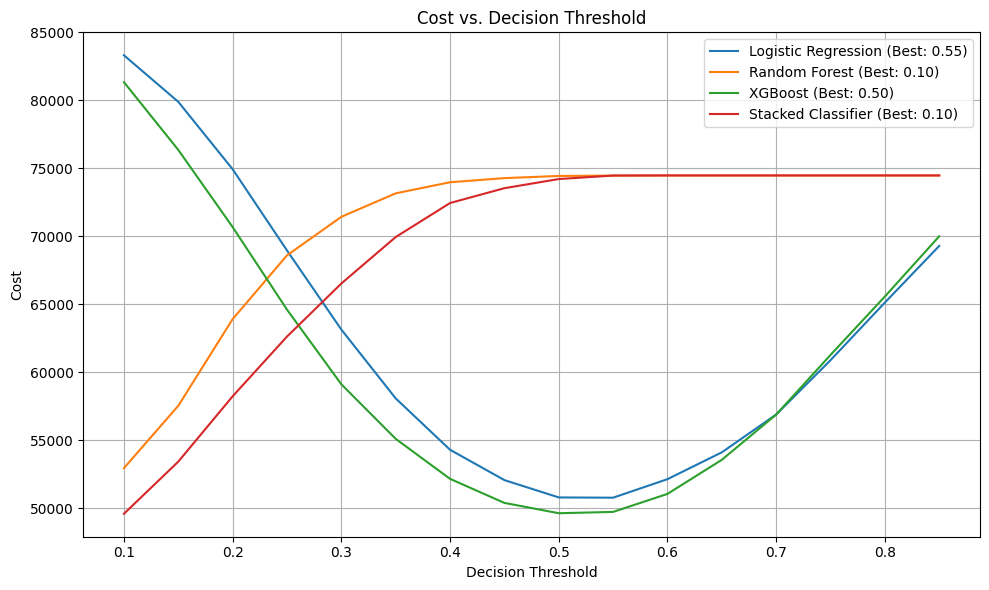

Best Thresholds and Business Costs:

Logistic Regression -> Threshold: 0.55, Cost: 50,782
Random Forest       -> Threshold: 0.10, Cost: 52,954
XGBoost             -> Threshold: 0.50, Cost: 49,640
Stacked Classifier  -> Threshold: 0.10, Cost: 49,598


In [ ]:
#list of possible thresholds from 0.1-0.9 with increments of 0.05
thresholds = np.arange(0.1, 0.90, 0.05)

# Compute costs for each threshold
costs_lr = calculate_cost(y_test, lr_probs, thresholds)
costs_rf = calculate_cost(y_test, rf_probs, thresholds)
costs_xgb = calculate_cost(y_test, xgb_probs, thresholds)
costs_ens = calculate_cost(y_test, ens_probs, thresholds)

# Get optimal thresholds 
best_lr = get_best_threshold(costs_lr)
best_rf = get_best_threshold(costs_rf)
best_xgb = get_best_threshold(costs_xgb)
best_ens = get_best_threshold(costs_ens)

# Plot cost vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, [x[1] for x in costs_lr], label=f'Logistic Regression (Best: {best_lr[0]:.2f})')
plt.plot(thresholds, [x[1] for x in costs_rf], label=f'Random Forest (Best: {best_rf[0]:.2f})')
plt.plot(thresholds, [x[1] for x in costs_xgb], label=f'XGBoost (Best: {best_xgb[0]:.2f})')
plt.plot(thresholds, [x[1] for x in costs_ens], label=f'Stacked Classifier (Best: {best_ens[0]:.2f})')

plt.xlabel('Decision Threshold')
plt.ylabel('Cost')
plt.title('Cost vs. Decision Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Best Thresholds and Business Costs:\n")
print(f"Logistic Regression -> Threshold: {best_lr[0]:.2f}, Cost: {best_lr[1]:,.0f}")
print(f"Random Forest       -> Threshold: {best_rf[0]:.2f}, Cost: {best_rf[1]:,.0f}")
print(f"XGBoost             -> Threshold: {best_xgb[0]:.2f}, Cost: {best_xgb[1]:,.0f}")
print(f"Stacked Classifier  -> Threshold: {best_ens[0]:.2f}, Cost: {best_ens[1]:,.0f}")


